In [24]:
import numpy as np
import matplotlib.pyplot as plt
# from constant_utils import *

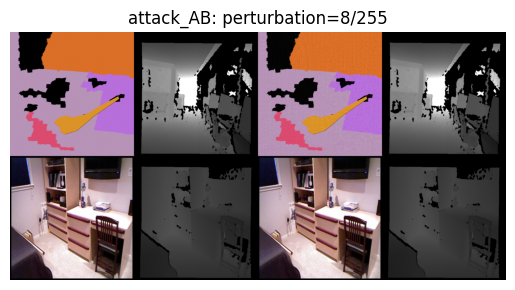

In [28]:

# attack_id = 'none'
# attack_id = 'attack_A'
attack_id = 'attack_AB'
# attack_id = 'attack_B'

epsilon = 8
i = 22

ATTACK_ID='attack_ABC'
# ATTACK_ID=none

EPSILON=8
ATTACK='PGD'
STEP=10

"/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_${ATTACK}${STEP}_${EPSILON}/${ATTACK_ID}/"

# img_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/{attack_id}/img2_prompt_{i}.npy')
# img_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/{attack_id}/img2_prompt_{i}_adv.npy') 
# tgt_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/{attack_id}/tgt2_prompt_{i}.npy') 
# tgt_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/{attack_id}/tgt2_prompt_{i}_adv.npy') 


img_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/changeA/{attack_id}/img2_prompt_{i}.npy')
img_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/changeA/{attack_id}/img2_prompt_{i}_adv.npy') 
tgt_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/changeA/{attack_id}/tgt2_prompt_{i}.npy') 
tgt_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/gt_exp/reimp_PGD10_8/changeA/{attack_id}/tgt2_prompt_{i}_adv.npy') 





test_img = np.concatenate((img_2, tgt_2, img_2_adv, tgt_2_adv), axis=1)
plt.axis('off')
plt.title(f'{attack_id}: perturbation={epsilon}/255')
plt.imshow(test_img)

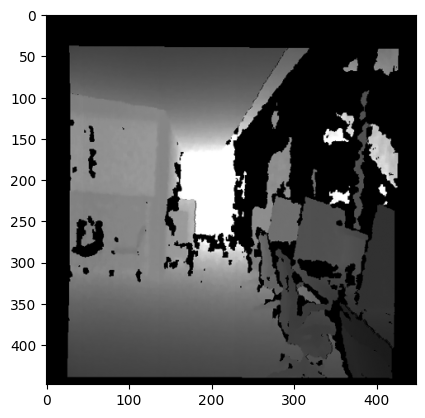

In [27]:
from PIL import Image

plt.imshow(plt.imread('/hhd3/ld/data/nyu_depth_v2/sync/study_room_0005b/sync_depth_00094.png'))


tgt = Image.open('/hhd3/ld/data/nyu_depth_v2/sync/study_room_0005b/sync_depth_00094.png')   ################################## 替换成真实的gt
tgt = np.array(tgt) / 10000.
tgt = tgt * 255
tgt = Image.fromarray(tgt).convert("RGB")
tgt = tgt.resize((448, 448))
tgt = np.array(tgt) / 255.

plt.imshow(tgt)

In [4]:
print(img_2.min(), img_2.max(), img_2_adv.min(), img_2_adv.max())
print(tgt_2.min(), tgt_2.max(), tgt_2_adv.min(), tgt_2_adv.max())

0.0 1.0 0.0 1.0
0.0 1.0 0.0 1.0


In [5]:
print((img_2_adv - img_2).min(), (img_2_adv - img_2).max(),(img_2_adv - img_2).min() >= -epsilon/255, (img_2_adv - img_2).max() <= epsilon/255)
print((tgt_2_adv - tgt_2).min(), (tgt_2_adv - tgt_2).max(),(tgt_2_adv - tgt_2).min() >= -epsilon/255, (tgt_2_adv - tgt_2).max() <= epsilon/255)

-0.03137254901960784 0.03137254901960787 True False
0.0 0.0 True True


In [6]:
img_2_adv - img_2

array([[[-1.56862745e-02,  3.92156863e-03, -2.35294118e-02],
        [-8.52724257e-03,  0.00000000e+00,  3.92156863e-03],
        [-3.13725490e-02,  3.92156863e-03, -6.56388793e-03],
        ...,
        [-3.92156863e-03, -3.13725490e-02, -3.13725490e-02],
        [-3.13725490e-02,  7.84313725e-03, -3.13725490e-02],
        [-7.84313725e-03,  8.81238142e-03,  3.13725490e-02]],

       [[ 9.35206772e-05, -3.13725490e-02,  1.17647059e-02],
        [ 1.17647059e-02, -3.13725490e-02,  1.17647059e-02],
        [-2.35294118e-02, -3.13725490e-02, -2.35294118e-02],
        ...,
        [-3.13725490e-02, -3.13725490e-02, -3.13725490e-02],
        [-3.13725490e-02, -3.13725490e-02, -3.13725490e-02],
        [ 0.00000000e+00, -3.13725490e-02, -1.50113132e-02]],

       [[ 1.56862745e-02, -3.27974745e-03, -3.13725490e-02],
        [ 3.92156863e-03,  3.92156863e-03,  3.92156863e-03],
        [-3.13725490e-02, -3.13725490e-02, -3.13725490e-02],
        ...,
        [ 1.96078431e-02,  3.13725490e-02,

In [7]:
tgt_2_adv - tgt_2

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

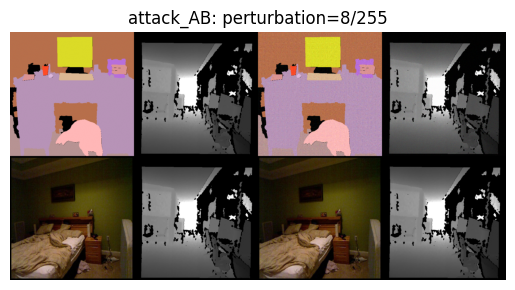

In [9]:
# attack_id = 'none'
# attack_id = 'attack_A'
attack_id = 'attack_AB'

epsilon = 8
i = 10


img_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/change_A/FGSM_8/img2_prompt_{i}.npy')
img_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/change_A/FGSM_8/img2_prompt_{i}_adv.npy') 
tgt_2 = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/change_A/FGSM_8/tgt2_prompt_{i}.npy') 
tgt_2_adv = np.load(f'/hhd3/ld/data/Painter_root/nyu_depth/change_A/FGSM_8/tgt2_prompt_{i}_adv.npy') 


test_img = np.concatenate((img_2, tgt_2, img_2_adv, tgt_2_adv), axis=1)
plt.axis('off')
plt.title(f'{attack_id}: perturbation={epsilon}/255')
plt.imshow(test_img)

In [10]:
print(img_2.min(), img_2.max(), img_2_adv.min(), img_2_adv.max())
print(tgt_2.min(), tgt_2.max(), tgt_2_adv.min(), tgt_2_adv.max())

0.0 1.0 0.0 1.0
0.0 1.0 0.0 1.0


In [11]:
print((img_2_adv - img_2).min(), (img_2_adv - img_2).max(),(img_2_adv - img_2).min() >= -epsilon/255, (img_2_adv - img_2).max() <= epsilon/255)
print((tgt_2_adv - tgt_2).min(), (tgt_2_adv - tgt_2).max(),(tgt_2_adv - tgt_2).min() >= -epsilon/255, (tgt_2_adv - tgt_2).max() <= epsilon/255)

-0.03137254901960784 0.03137254901960787 True False
-0.03137251362204552 0.031372539699077606 True True


In [12]:
img_2_adv - img_2

array([[[-0.01534025, -0.03137255, -0.0134243 ],
        [ 0.02606619,  0.03137255,  0.0082677 ],
        [-0.00240329, -0.00417935,  0.03137255],
        ...,
        [-0.03137255,  0.01191827,  0.01072522],
        [-0.03137255,  0.03137255,  0.01830368],
        [ 0.03137255,  0.02763077,  0.01588179]],

       [[ 0.02599479, -0.03137255, -0.00087989],
        [ 0.0017061 ,  0.00365548,  0.03137255],
        [-0.01105737,  0.01255838,  0.02168336],
        ...,
        [ 0.03137255, -0.01138959, -0.01771587],
        [ 0.00054752,  0.03137255, -0.03137255],
        [ 0.01992343,  0.03137255, -0.00565519]],

       [[ 0.02886963, -0.03137255, -0.02110855],
        [ 0.01446812,  0.02104656,  0.03137255],
        [ 0.02218142,  0.01730273,  0.03137255],
        ...,
        [-0.03137255, -0.03137255,  0.03137255],
        [-0.03137255, -0.00624855, -0.01927036],
        [-0.02784856,  0.03137255, -0.00045091]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [13]:
tgt_2_adv - tgt_2

array([[[0.        , 0.00931475, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.00322096, 0.00599031],
        ...,
        [0.        , 0.        , 0.00576551],
        [0.00859155, 0.01056227, 0.        ],
        [0.        , 0.        , 0.0138586 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.0266223 , 0.        ],
        [0.        , 0.01354267, 0.        ],
        ...,
        [0.00228259, 0.        , 0.        ],
        [0.02594594, 0.01052165, 0.02480512],
        [0.03000754, 0.        , 0.        ]],

       [[0.        , 0.0086715 , 0.01922275],
        [0.        , 0.        , 0.        ],
        [0.        , 0.0135012 , 0.02312693],
        ...,
        [0.0034473 , 0.02029624, 0.        ],
        [0.022439  , 0.02806934, 0.        ],
        [0.03008404, 0.        , 0.02080745]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0